# Testing Gaussian Classifier on Clusters

Checking how the decision boundary behaves when a Gaussian NB Classifier is implemented. We expect ellipsoids, but get lines in the first few examples because of how the data is split. A curve is seen when the data is much more closer.

See https://rasbt.github.io/mlxtend/user_guide/plotting/plot_decision_regions/ for comparison of 4 classifiers.

## Two seperate clusters

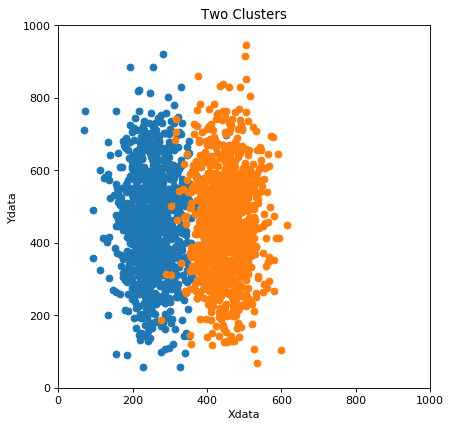

0.98


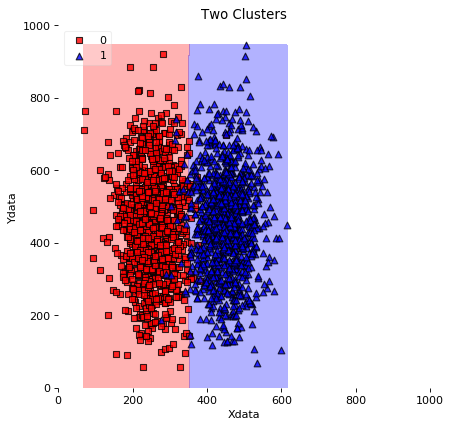

In [6]:
import numpy as np
import matplotlib.pyplot as plt

# Common Variables
figsize = (6,6)

# Create Cluster one
np.random.seed(19680801) # Fix seed for reproducibility
Xmu, Xsigma = 250, 50 # mean and standard deviation
Ymu, Ysigma = 450, 150 # mean and standard deviation
X = (np.random.normal(Xmu, Xsigma, 1000)).astype(np.integer)
Y = np.random.normal(Ymu, Ysigma, 1000).astype(np.integer)

# Create Cluster two, shifted to the right
np.random.seed(336808341) # Fix seed for reproducibility
Z = ((np.random.normal(Xmu, Xsigma, 1000)).astype(np.integer) + 200).astype(np.integer)
Y2 = np.random.normal(Ymu, Ysigma, 1000).astype(np.integer)

# Scatterplot the two clusters
f1=plt.figure(figsize=figsize, dpi= 80, facecolor='w', edgecolor='k') # Create new figure
plt.scatter(X,Y)
plt.scatter(Z,Y2)
plt.xlabel('Xdata') # Operates on current figure
plt.ylabel('Ydata')
plt.title('Two Clusters')
ax = plt.gca()
ax.set_xlim(0,1000)
ax.set_ylim(0,1000)
plt.show()

# Run the GaussianNB Classifier on them
from mlxtend.plotting import plot_decision_regions
from sklearn.naive_bayes import GaussianNB 
Data = np.column_stack((X,Y))
Data2 = np.column_stack((Z,Y2))
DataFull = np.append(Data, Data2)
DFull = np.reshape(DataFull, (2000,2))
l3 = (np.append(np.zeros(1000), np.ones(1000))).astype(np.integer)

DF1 = DFull.astype(np.integer)
# DFull = []
# Data = []
# Data2 = []
# DataFull = []

clf1=GaussianNB()
clf1.fit(DF1, l3);
fig = plt.figure(figsize=figsize, dpi= 80, facecolor='w', edgecolor='k')
fig2 = plot_decision_regions(X=DF1, y=l3.astype(np.integer), clf=clf1, legend=2, res = 1.0)
plt.xlabel('Xdata')
plt.ylabel('Ydata')
plt.title('Two Clusters')
ax = fig.gca()
ax.set_xlim(0,1000)
ax.set_ylim(0,1000)
print(clf1.score(DF1, l3))
plt.show()


## Two clusters with right cluster tilted to the right

Score for Classification:  0.609


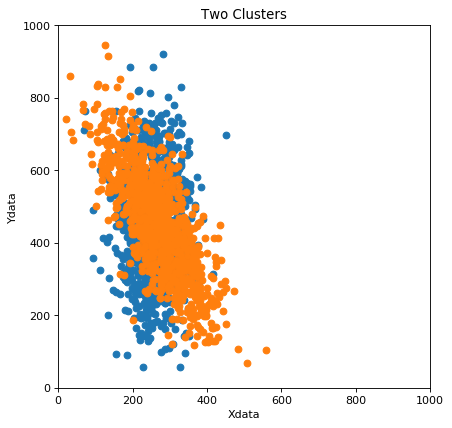

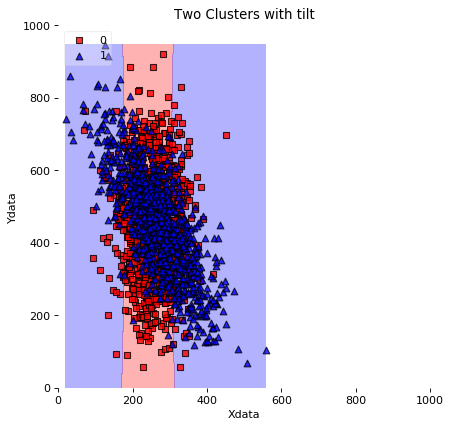

In [2]:
# Recreate Right Cluster Data
np.random.seed(336808341) # Fix seed for reproducibility
Z = ((np.random.normal(Xmu, Xsigma, 1000)).astype(np.integer) + 200).astype(np.integer)
Y2 = np.random.normal(Ymu, Ysigma, 1000).astype(np.integer)

# Tilt right cluster
Z = (Z - ((400 * Y2 / 1000)) ).astype(np.integer)

fig=plt.figure(figsize=(6, 6), dpi= 80, facecolor='w', edgecolor='k')
plt.scatter(X,Y)
plt.scatter(Z,Y2)
plt.xlabel('Xdata')
plt.ylabel('Ydata')
plt.title('Two Clusters')
ax = fig.gca()
ax.set_xlim(0,1000)
ax.set_ylim(0,1000)


# l3 = np.append(np.zeros(1000), np.ones(1000))
from mlxtend.plotting import plot_decision_regions
from sklearn.naive_bayes import GaussianNB 
Data = np.column_stack((X,Y))
Data2 = np.column_stack((Z,Y2))
DataFull = np.append(Data, Data2)
DFull = np.reshape(DataFull, (2000,2))
l3 = (np.append(np.zeros(1000), np.ones(1000))).astype(np.integer)

DF1 = DFull.astype(np.integer)
# DFull = []
# Data = []
# Data2 = []
# DataFull = []

clf1=GaussianNB()
clf1.fit(DF1, l3);
print('Score for Classification: ', clf1.score(DF1, l3))
plt.show()
fig = plt.figure(figsize=(6, 6), dpi= 80, facecolor='w', edgecolor='k')
fig2 = plot_decision_regions(X=DF1, y=l3.astype(np.integer), clf=clf1, legend=2, res = 1.0)
plt.xlabel('Xdata')
plt.ylabel('Ydata')
plt.title('Two Clusters with tilt')
ax = fig.gca()
ax.set_xlim(0,1000)
ax.set_ylim(0,1000)
plt.show()

## Break two clusters into top half and bottom half

Below, we take the top half of both the clusters and classify seperately, and then take the bottom half of the clusters and classify seperately.

The average score above was 60.9%.
The score for the top half is 59.8% and the bottom half is 70.3%

Score Bottom Half:  0.703
Score Top Half:  0.598


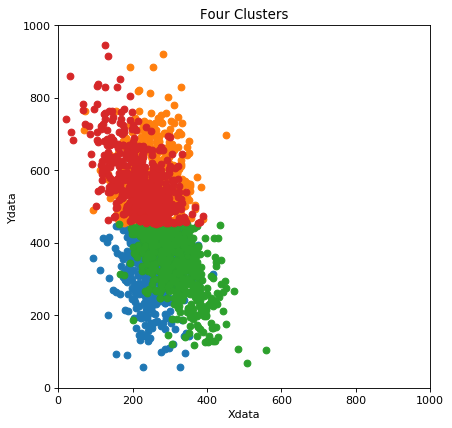

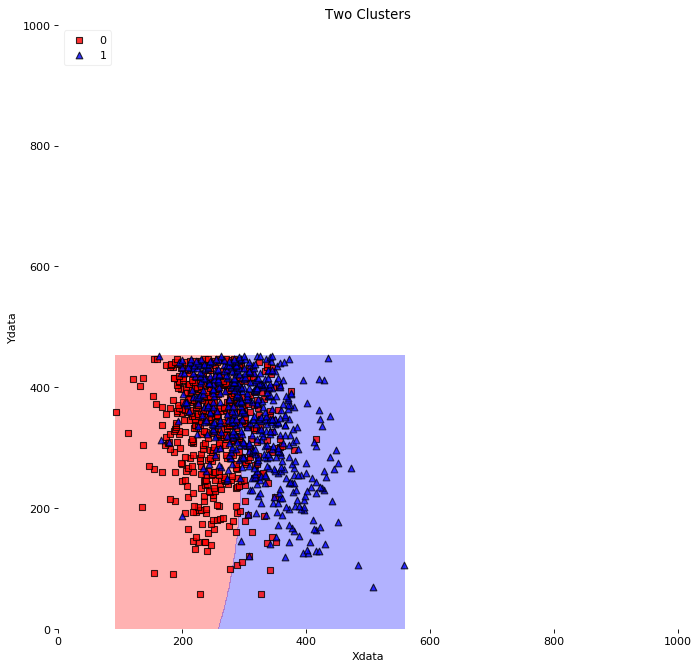

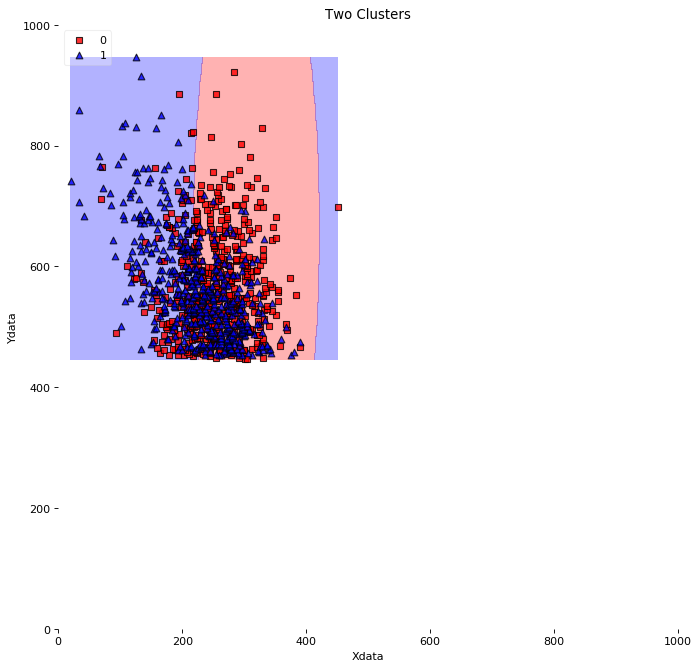

In [10]:
np.random.seed(336808341) # Fix seed for reproducibility
Z = ((np.random.normal(Xmu, Xsigma, 1000)).astype(np.integer) + 200).astype(np.integer)
Y2 = np.random.normal(Ymu, Ysigma, 1000).astype(np.integer)
Z = (Z - ((400 * Y2 / 1000)) ).astype(np.integer)

#plt.show()

# l3 = np.append(np.zeros(1000), np.ones(1000))
from mlxtend.plotting import plot_decision_regions
from sklearn.naive_bayes import GaussianNB 
Data = np.column_stack((X,Y))
Data.view('int,int').sort(order=['f1'], axis=0)
Data2 = np.column_stack((Z,Y2))
Data2.view('int,int').sort(order=['f1'], axis=0)

#BlueTop = Data[:500]
fig=plt.figure(figsize=(6, 6), dpi= 80, facecolor='w', edgecolor='k')
plt.scatter(Data[:500,0], Data[:500,1])
plt.scatter(Data[500:,0], Data[500:,1])
plt.scatter(Data2[:500,0], Data2[:500,1])
plt.scatter(Data2[500:,0], Data2[500:,1])
plt.xlabel('Xdata')
plt.ylabel('Ydata')
plt.title('Four Clusters')
ax = fig.gca()
ax.set_xlim(0,1000)
ax.set_ylim(0,1000)
#plt.show()

DataFull = np.append(Data[:500,:], Data2[:500,:])
DFull = np.reshape(DataFull, (1000,2))
l3 = (np.append(np.zeros(500), np.ones(500))).astype(np.integer)

DF1 = DFull.astype(np.integer)
# DFull = []
# Data = []
# Data2 = []
# DataFull = []

# Bottom Half of Data
clf1=GaussianNB()
clf1.fit(DF1, l3);
print('Score Bottom Half: ', clf1.score(DF1, l3))
#plt.show()
fig = plt.figure(figsize=(10, 10), dpi= 80, facecolor='w', edgecolor='k')
fig2 = plot_decision_regions(X=DF1, y=l3.astype(np.integer), clf=clf1, legend=2, res = 1.0)
plt.xlabel('Xdata')
plt.ylabel('Ydata')
plt.title('Two Clusters')
ax = plt.gca()
ax.set_xlim(0,1000)
ax.set_ylim(0,1000)
#plt.show()


# Top Half of Data
DataFull = np.append(Data[500:,:], Data2[500:,:])
DFull = np.reshape(DataFull, (1000,2))
l3 = (np.append(np.zeros(500), np.ones(500))).astype(np.integer)

DF1 = DFull.astype(np.integer)
# DFull = []
# Data = []
# Data2 = []
# DataFull = []

clf1=GaussianNB()
clf1.fit(DF1, l3);
print('Score Top Half: ', clf1.score(DF1, l3))
#plt.show()
fig = plt.figure(figsize=(10, 10), dpi= 80, facecolor='w', edgecolor='k')
fig2 = plot_decision_regions(X=DF1, y=l3.astype(np.integer), clf=clf1, legend=2, res = 1.0)
plt.xlabel('Xdata')
plt.ylabel('Ydata')
plt.title('Two Clusters')
ax = fig.gca()
ax.set_xlim(0,1000)
ax.set_ylim(0,1000)
plt.show()

Score  0.9965


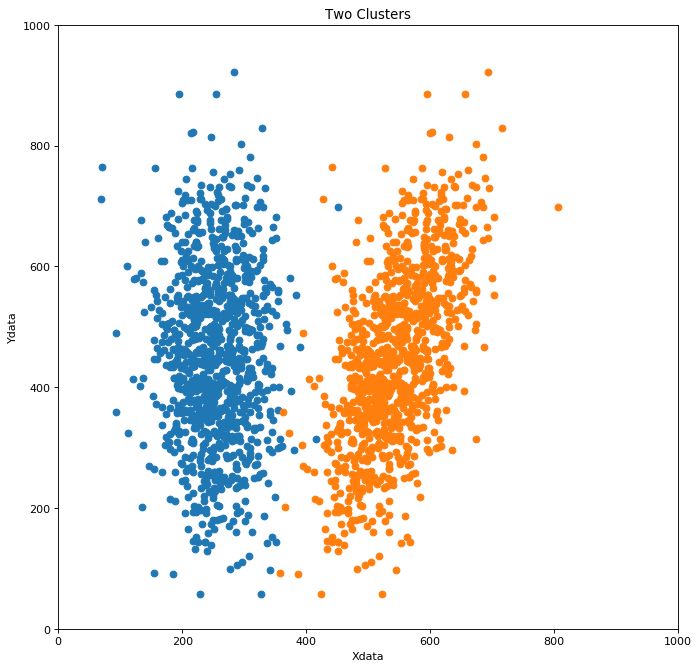

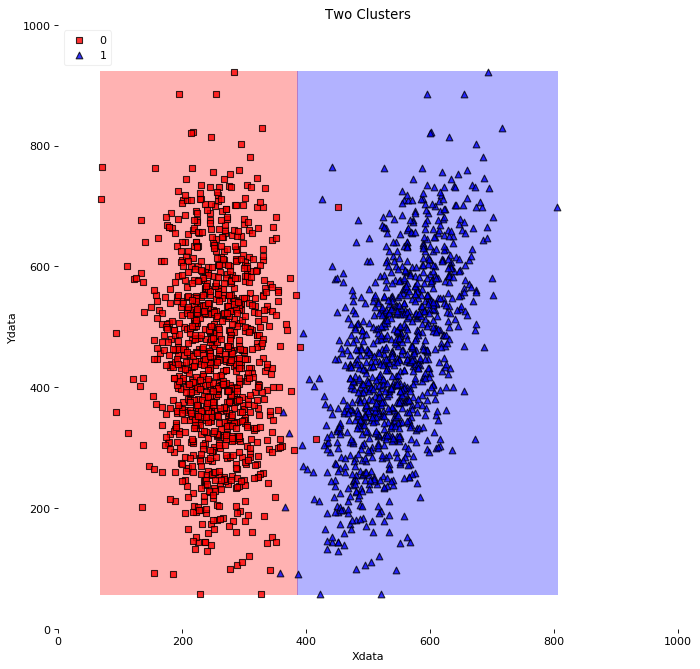

In [6]:
Z = X + 200 + ((250 * Y / 1000) - 20)

fig=plt.figure(figsize=(10, 10), dpi= 80, facecolor='w', edgecolor='k')
plt.scatter(X,Y)
plt.scatter(Z,Y)
plt.xlabel('Xdata')
plt.ylabel('Ydata')
plt.title('Two Clusters')
ax = fig.gca()
ax.set_xlim(0,1000)
ax.set_ylim(0,1000)


# l3 = np.append(np.zeros(1000), np.ones(1000))

# l3 = np.append(np.zeros(1000), np.ones(1000))
from mlxtend.plotting import plot_decision_regions
from sklearn.naive_bayes import GaussianNB 
Data = np.column_stack((X,Y))
Data2 = np.column_stack((Z,Y))
DataFull = np.append(Data, Data2)
DFull = np.reshape(DataFull, (2000,2))
l3 = (np.append(np.zeros(1000), np.ones(1000))).astype(np.integer)

DF1 = DFull.astype(np.integer)
# DFull = []
# Data = []
# Data2 = []
# DataFull = []

clf1=GaussianNB()
clf1.fit(DF1, l3);
print('Score ', clf1.score(DF1, l3))
plt.show()
fig = plt.figure(figsize=(10,10), dpi= 80, facecolor='w', edgecolor='k')
fig2 = plot_decision_regions(X=DF1, y=l3.astype(np.integer), clf=clf1, legend=2, res = 1.0)
plt.xlabel('Xdata')
plt.ylabel('Ydata')
plt.title('Two Clusters')
ax = fig.gca()
ax.set_xlim(0,1000)
ax.set_ylim(0,1000)
plt.show()

Score  0.9


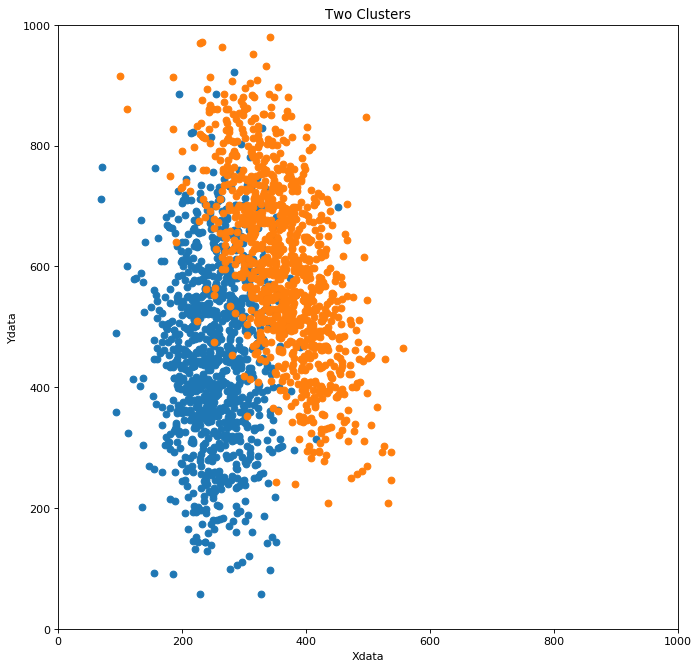

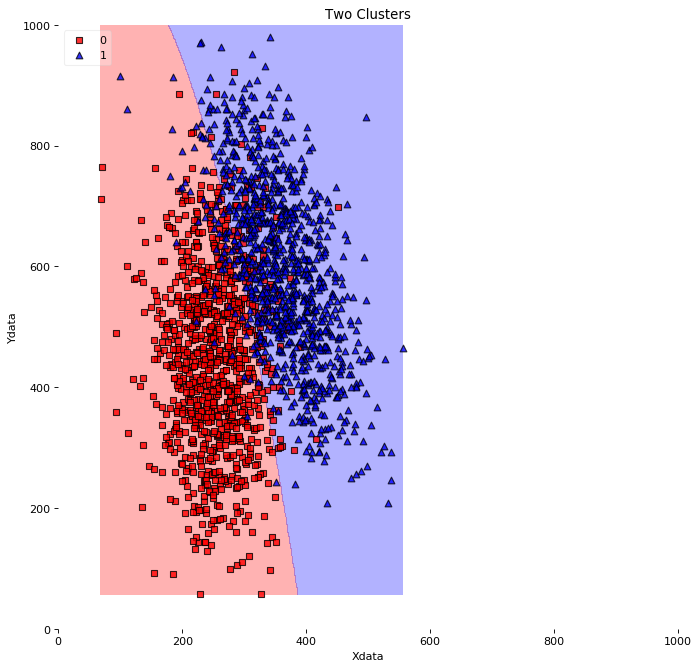

In [7]:
Z = X + 200 - ((250 * Y / 1000) - 20)
Y2 = Y + 150;
fig=plt.figure(figsize=(10, 10), dpi= 80, facecolor='w', edgecolor='k')
plt.scatter(X,Y)
plt.scatter(Z,Y2)
plt.xlabel('Xdata')
plt.ylabel('Ydata')
plt.title('Two Clusters')
ax = fig.gca()
ax.set_xlim(0,1000)
ax.set_ylim(0,1000)


# l3 = np.append(np.zeros(1000), np.ones(1000))
from mlxtend.plotting import plot_decision_regions
from sklearn.naive_bayes import GaussianNB 
Data = np.column_stack((X,Y))
Data2 = np.column_stack((Z,Y2))
DataFull = np.append(Data, Data2)
DFull = np.reshape(DataFull, (2000,2))
l3 = (np.append(np.zeros(1000), np.ones(1000))).astype(np.integer)

DF1 = DFull.astype(np.integer)
# DFull = []
# Data = []
# Data2 = []
# DataFull = []

clf1=GaussianNB()
clf1.fit(DF1, l3);
print('Score ', clf1.score(DF1, l3))
plt.show()
fig = plt.figure(figsize=(10, 10), dpi= 80, facecolor='w', edgecolor='k')
fig2 = plot_decision_regions(X=DF1, y=l3.astype(np.integer), clf=clf1, legend=2, res = 1.0)
plt.xlabel('Xdata')
plt.ylabel('Ydata')
plt.title('Two Clusters')
ax = fig.gca()
ax.set_xlim(0,1000)
ax.set_ylim(0,1000)
plt.show()

Score  0.815


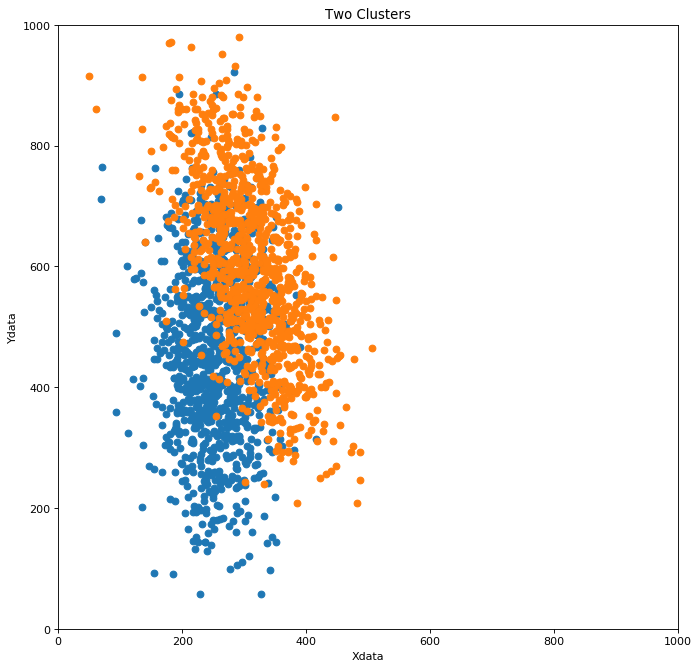

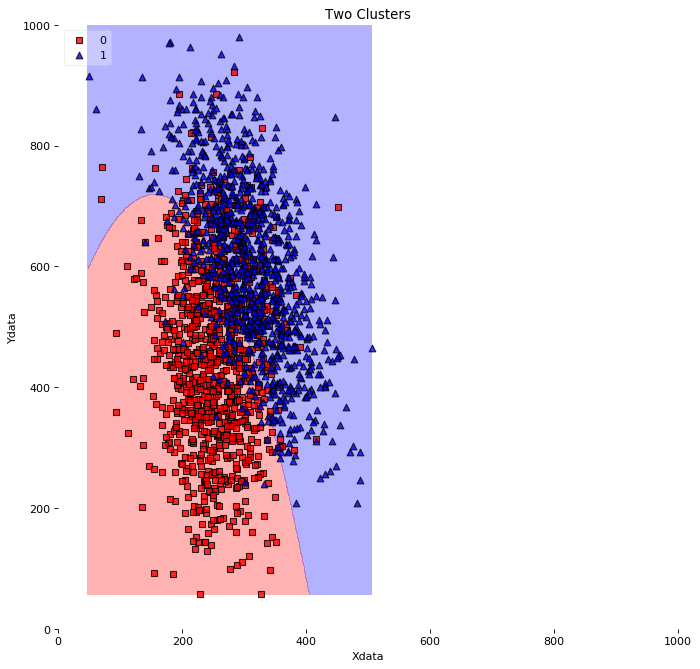

In [8]:
Z = X + 150 - ((250 * Y / 1000) - 20)
Y2 = Y + 150;
fig=plt.figure(figsize=(10, 10), dpi= 80, facecolor='w', edgecolor='k')
plt.scatter(X,Y)
plt.scatter(Z,Y2)
plt.xlabel('Xdata')
plt.ylabel('Ydata')
plt.title('Two Clusters')
ax = fig.gca()
ax.set_xlim(0,1000)
ax.set_ylim(0,1000)


# l3 = np.append(np.zeros(1000), np.ones(1000))
from mlxtend.plotting import plot_decision_regions
from sklearn.naive_bayes import GaussianNB 
Data = np.column_stack((X,Y))
Data2 = np.column_stack((Z,Y2))
DataFull = np.append(Data, Data2)
DFull = np.reshape(DataFull, (2000,2))
l3 = (np.append(np.zeros(1000), np.ones(1000))).astype(np.integer)

DF1 = DFull.astype(np.integer)
# DFull = []
# Data = []
# Data2 = []
# DataFull = []

clf1=GaussianNB()
clf1.fit(DF1, l3);
print('Score ', clf1.score(DF1, l3))
plt.show()
fig = plt.figure(figsize=(10, 10), dpi= 80, facecolor='w', edgecolor='k')
fig2 = plot_decision_regions(X=DF1, y=l3.astype(np.integer), clf=clf1, legend=2, res = 1.0)
plt.xlabel('Xdata')
plt.ylabel('Ydata')
plt.title('Two Clusters')
ax = fig.gca()
ax.set_xlim(0,1000)
ax.set_ylim(0,1000)
plt.show()